# Week 5 & 6 Exercise
Complete the following exercises. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

1. Data Wrangling with Python: Activity 7, page 207

2. Data Wrangling with Python: Activity 8, page 233

3. Insert data into a SQL Lite database – create a table with the following data (Hint: Python for Data Analysis page 191):

a. Name, Address, City, State, Zip, Phone Number

b. Add at least 10 rows of data and submit your code with a query generating your results.


## Activity 7

In this activity you are given the Wikipedia page where we have the GDP of all countries listed and you are asked to create three data frames from the three sources mentioned in the page ( link - https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal) )

You will have to -

- Open the page in a separate chrome/firefox tab and use something like `inspect element` tool to see the source HTML and understand the structure
- Read the page using bs4
- Find the table structure you will need to deal with (how many tables are there)
- Find the right table using bs4
- Separate the Source Names and their corresponding data
- Get the source names from the list of sources you have created
- Seperate the header and data from the data that you separated before. For the first source only. And then create a DataFrame using that
- Repeat the last task for the other two data sources.


## 1) Open the pate in separate Chrome/Firfox tab and use something lie an Inspace Element tool to view the source HTML and understand the structure

In [131]:
# Load the BeautifulSoup and pandas library
from bs4 import BeautifulSoup
import pandas as pd

## 2) Read the page using bs4

In [132]:
# As per guidline I have saved the sorce page in html format. 
# https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)
fd = open("./Data/List of countries by GDP (nominal) - Wikipedia_latest.htm", "r")
soup = BeautifulSoup(fd)
fd.close()

## 3) How many tables are there?

In [133]:
all_tables = soup.find_all("table")
print("Total number of tables are {} ".format(len(all_tables)))

Total number of tables are 10 


## 4) find the right table using the class attribute
 

In [134]:
# With the help of inspect functionality of broused found the class name of table. And find the class.
data_table = soup.find("table", {"class": "wikitable" })
print(type(data_table))

<class 'bs4.element.Tag'>


## 5) Let's separate the source and the actual data

In [135]:
# Find the how maney tables inside parent table
sources = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]
print(len(sources_list))

3


In [136]:
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

In [137]:
data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))

In [138]:
# I found three tables as part of separation of the source and actual data
len(data_tables)

3

## 6) Get the source names from the list of sources

In [139]:
# Looking for all a tags in source and print them
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)
# I found three columns and there header names

['International Monetary Fund', 'World Bank', 'United Nations']


## 7) Seperate the header and data from the data that you separated before. 

## 7.1) For the first source only. And then create a DataFrame using that

In [140]:
# Print the table structure for debugging
data_tables[0][0]

<table class="wikitable sortable" style="margin-left:auto; margin-right:auto; margin-top:0;">
<tbody><tr>
<th data-sort-type="number" style="width:2em;">Rank</th>
<th>Country/Territory</th>
<th>GDP<br/>(US$million)
</th></tr>
<tr style="font-weight:bold;background:#eaecf0">
<td data-sort-value="-1"> </td>
<td data-sort-value=""><span class="flagicon" style="padding-left:25px;"> </span><i><a href="/wiki/Gross_world_product" title="Gross world product">World</a></i><sup class="reference" id="cite_ref-IMF_Groups_20-1"><a href="#cite_note-IMF_Groups-20">[19]</a></sup></td>
<td align="right">83,844,988
</td></tr>
<tr>
<td align="right">1</td>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_

In [141]:
# Extract the header name for first table
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('tr')[0].findAll('th')]
header1

['Rank', 'Country/Territory', 'GDP(US$million)']

In [142]:
# Find all the rows in table
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]

In [143]:
#Create array of columns vlaues 
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]

In [144]:
# Create a dataframe 
df1 = pd.DataFrame(data_rows1, columns=header1)

In [145]:
# Print the head of dataframe
df1.head()

,Rank,Country/Territory,GDP(US$million)
0,,World[19],"83,844,988"
1,1,United States,"20,807,269"
2,2,China[n 2][n 3],"14,860,775"
3,3,Japan,"4,910,580"
4,4,Germany,"3,780,553"


## 7.2) Do the same for the other two sources

In [146]:
# Extract the header name for second table
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('tr')[0].findAll('th')]
header2

['Rank', 'Country/Territory', 'GDP(US$million)']

In [147]:
# Find all the rows in table
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]

In [148]:
# Created separate method to find the text
def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()

In [149]:
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]
#Create array of columns vlaues 
# data_rows2 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]

In [150]:
# Create a dataframe 
df2 = pd.DataFrame(data_rows2, columns=header2)

In [151]:
# Print the head of dataframe
df2.head()

,Rank,Country/Territory,GDP(US$million)
0,,World,"87,751,541"
1,1,United States,"21,427,700"
2,2,China[n 9],"14,342,903"
3,3,Japan,"5,081,770"
4,4,Germany,"3,845,630"


# 7.3) Do the same for the other third sources

In [152]:
# Now for the third one
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('tr')[0].findAll('th')]
header3

['Rank', 'Country/Territory', 'GDP(US$million)']

In [153]:
# Find all the rows in table
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]

In [154]:
# Create a dataframe
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [155]:
df3 = pd.DataFrame(data_rows3, columns=header3)
# Print the head of dataframe
df3.head()

,Rank,Country/Territory,GDP(US$million)
0,,World,"87,751,541"
1,1,United States,"21,427,700"
2,2,China[n 9],"14,342,903"
3,3,Japan,"5,081,770"
4,4,Germany,"3,845,630"


# Activity 8

In this activity we do the following

* Create a data frame from a given CSV
* Check for duplicates in the columns that matter
* Check for NaN in the columns that matter
* Apply our domain knowledge to single out and remove outliers
* Generate nice print statements as reports for differents steps

The data set is a 1000 row data set which represnets the traffic on a certain page of a website. The Names, email, and IP are faked out in order to keep the privacy


In [156]:
## Import pandas, numpy and matplotlid library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [157]:
# Read a visit_data.csv from Data folder
df = pd.read_csv("./Data/visit_data.csv")

In [158]:
# Print the sample data
df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


Just a glace I observed lot of missing values

### 2) Check for duplicates

In [159]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


In [160]:
# After checking dubps I dont find any duplicates. Thats good!

### 3) Check if any essential column contain NaN?

In [161]:
# check are there any missine of NaN values in some coloums
# Auther gave nice way to formate the data %
print("The column Email contains NaN - %r " % df.email.isnull().values.any())
print("The column IP Address contains NaN - %s " % df.ip_address.isnull().values.any())
print("The column Visit contains NaN - %s " % df.visit.isnull().values.any())
print("The column first_name contains NaN - %s " % df.first_name.isnull().values.any())
print("The column last_name contains NaN - %s " % df.last_name.isnull().values.any())

The column Email contains NaN - False 
The column IP Address contains NaN - False 
The column Visit contains NaN - True 
The column first_name contains NaN - True 
The column last_name contains NaN - True 


### The first_name , last_name and Visit columns has NaN values. From the context of data we are trying to find the probalility of vistis, if the data is missing for Visit. We can cosider them as outliners. 


### 4) Get rid of the outliers

In [162]:
# We have multiple way to find the NaN data and remove them. 
# 1) dataframe.dropna
# 2) dataframe.isnull 
# 3) dataframe.isfinite

# But before that we need to store the previous size of the data set and we will compare it with the new size
size_prev = df.shape
df = df[np.isfinite(df['visit'])] #This is an inplace operation. After this operation the original DataFrame is lost.
size_after = df.shape

### 5) Report the size difference

In [163]:

print("Previous data size was - {prev[0]} rows and the size of the new one is - {after[0]} rows".
      format(prev=size_prev, after=size_after))

Previous data size was - 1000 rows and the size of the new one is - 974 rows


### 6) Create a box plot to check the outliners

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa90e6d7e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa90e6e4580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa90e6d7b20>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa90e6e4c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa90e6e4f40>],
 'means': []}

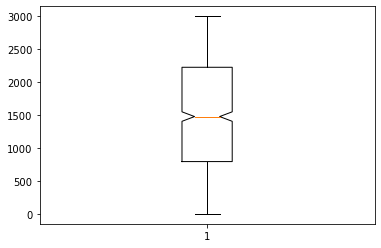

In [164]:
plt.boxplot(df.visit, notch=True)

As we can see that we have data in this column in the interval (0, 3000). However, the main concentration of the data is between ~700 to ~2300. Let us say that anything beyond 2900 and bellow 100 are outliers for us. We need to get rid of them

The coulmn in the interval values varies between 0 - 3000. I fill like most concetration of data is between ~700 to ~2300. Lets remove other data (Beyond 2300 and bellow 700)

In [165]:
df1 = df[(df['visit'] <= 2300) & (df['visit'] >= 700)] 

In [166]:
# Let see how many records got removed after removal of outliners.
print("After getting rid of outliers the new size of the data is - {}".format(*df1.shape))

After getting rid of outliers the new size of the data is - 547


# 3) Insert data into a SQL Lite database – create a table with the following data (Hint: Python for Data Analysis page 191):

a. Name, Address, City, State, Zip, Phone Number

b. Add at least 10 rows of data and submit your code with a query generating your results.

In [169]:
import sqlite3

query = """CREATE TABLE PROFILE2
            (NAME VARCHAR(50), ADDRESS VARCHAR(50), CITY VARCHAR(50),STATE VARCHAR(50),ZIP INTEGER,
            PHONE_NUMBER VARCHAR(11))"""

con = sqlite3.connect('mydata.sqlite')
con.execute(query)
con.commit()

In [170]:
data = [('Dhiraj', '420 Summit Dr', 'Schaumburg' ,'IL' ,60193,'8888888888'),
       ('Dhiraj1', '421 Summit Dr', 'Schaumburg' ,'IL' ,60193,'8888888880'),
       ('Dhiraj2', '422 Summit Dr', 'Schaumburg' ,'IL' ,60193,'8888888881'),
       ('Dhiraj3', '423 Summit Dr', 'Schaumburg' ,'IL' ,60193,'8888888882'),
       ('Dhiraj4', '424 Summit Dr', 'Schaumburg' ,'IL' ,60193,'8888888883'),
       ('Dhiraj5', '425 Summit Dr', 'Schaumburg' ,'IL' ,60193,'8888888884'),
       ('Dhiraj6', '426 Summit Dr', 'Schaumburg' ,'IL' ,60193,'8888888885'),
       ('Dhiraj7', '427 Summit Dr', 'Schaumburg' ,'IL' ,60193,'8888888886'),
       ('Dhiraj8', '428 Summit Dr', 'Schaumburg' ,'IL' ,60193,'8888888887'),
       ('Dhiraj9', '429 Summit Dr', 'Schaumburg' ,'IL' ,60193,'8888888822'),
       ('Dhiraj10','430 Summit Dr', 'Schaumburg' ,'IL' ,60193,'8888888834')]
stmt = "INSERT INTO PROFILE2 VALUES (?,?,?,?,?,?)"
con.executemany(stmt,data)
con.commit()

In [171]:
cursor = con.execute('select * from PROFILE2')
rows = cursor.fetchall()
rows

[('Dhiraj', '420 Summit Dr', 'Schaumburg', 'IL', 60193, '8888888888'),
 ('Dhiraj1', '421 Summit Dr', 'Schaumburg', 'IL', 60193, '8888888880'),
 ('Dhiraj2', '422 Summit Dr', 'Schaumburg', 'IL', 60193, '8888888881'),
 ('Dhiraj3', '423 Summit Dr', 'Schaumburg', 'IL', 60193, '8888888882'),
 ('Dhiraj4', '424 Summit Dr', 'Schaumburg', 'IL', 60193, '8888888883'),
 ('Dhiraj5', '425 Summit Dr', 'Schaumburg', 'IL', 60193, '8888888884'),
 ('Dhiraj6', '426 Summit Dr', 'Schaumburg', 'IL', 60193, '8888888885'),
 ('Dhiraj7', '427 Summit Dr', 'Schaumburg', 'IL', 60193, '8888888886'),
 ('Dhiraj8', '428 Summit Dr', 'Schaumburg', 'IL', 60193, '8888888887'),
 ('Dhiraj9', '429 Summit Dr', 'Schaumburg', 'IL', 60193, '8888888822'),
 ('Dhiraj10', '430 Summit Dr', 'Schaumburg', 'IL', 60193, '8888888834')]